downloading necessary modules

In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

reading features + ground truth 

In [68]:
features_df = pd.read_csv('primekg_cardiovascular_20240223_scores.tsv', sep='\t')
ground_truth_df = pd.read_csv('merged_cardio.tsv', sep='\t')

print(features_df)
print(ground_truth_df)

           drugA    drugB     sAB  opAB  meanspAB  medianspAB  minspAB  \
0        DB06709  DB08506  0.3427     0    0.6150       0.630     0.46   
1        DB06709  DB02376  0.4188     0    0.6850       0.685     0.56   
2        DB06709  DB04282  0.4188     0    0.6850       0.685     0.56   
3        DB06709  DB04564  0.4188     0    0.6850       0.685     0.56   
4        DB06709  DB04659  0.4188     0    0.6850       0.685     0.56   
...          ...      ...     ...   ...       ...         ...      ...   
9730661  DB08873  DB07191  0.1295     0    0.6093       0.625     0.44   
9730662  DB08873  DB08846  0.1319     0    0.4865       0.460     0.20   
9730663  DB08873  DB08865  0.1585     0    0.4858       0.480     0.26   
9730664  DB08873  DB05891  0.1004     0    0.8725       0.870     0.65   
9730665  DB08873  DB05508  0.2084     0    0.5350       0.530     0.41   

         maxspAB    zTDA    zTDB  ...  opAD  opBD  meanspAD  meanspBD  \
0           0.74  0.4405  1.2862  ... 

In [61]:
'''features_df = features_df.drop(['meanspAB', 'meanspBD', 'medianspAD', 'medianspAB',
       'medianspBD', 'maxspAB', 'opBD', 'meanspAD', 'minspBD', 'minspAD',
       'maxspAD', 'opAB'],axis=1)'''

"features_df = features_df.drop(['meanspAB', 'meanspBD', 'medianspAD', 'medianspAB',\n       'medianspBD', 'maxspAB', 'opBD', 'meanspAD', 'minspBD', 'minspAD',\n       'maxspAD', 'opAB'],axis=1)"

merge features, ground truth over drugA drugB 

In [69]:
merged_df = pd.merge(features_df, ground_truth_df, on=['drugA', 'drugB'])
merged_df.set_index(['drugA', 'drugB'], inplace=True)
print(merged_df)

                    sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB    zTDA  \
drugA   drugB                                                                   
DB00001 DB00908  0.2497     0    0.5420       0.470     0.42     0.86 -1.1291   
        DB00721  0.3518     0    0.7025       0.605     0.48     1.12 -1.1291   
        DB01109  0.0183     0    0.2867       0.340     0.12     0.40 -1.1291   
        DB00606  0.3436     0    0.5617       0.540     0.40     0.78 -1.1291   
        DB00482  0.2900     0    0.4883       0.495     0.29     0.67 -1.1291   
...                 ...   ...       ...         ...      ...      ...     ...   
DB08899 DB08932  0.1233     0    0.3000       0.300     0.28     0.32 -1.3003   
DB08905 DB08932  0.3833     0    0.5550       0.555     0.55     0.56  0.1832   
DB08918 DB08932  0.1547     0    0.5200       0.520     0.41     0.61 -2.0806   
DB08932 DB08953  0.3467     0    0.5200       0.520     0.51     0.53 -0.3310   
        DB08954  0.0550     

X and Y for training and testing

In [70]:
X = merged_df.drop(['adv/app','drugcomb','sA','sB','opA','opB'], axis=1)                     #Annahme: 'adv/app' ist Ihre Zielvariable
Y = merged_df['adv/app']

print(len(Y[Y==0]))
print(len(Y[Y==1]))

48543
257


split of train and test groups, decisiontreeclassifier, look at feature importances + calculate cumulative sum of features + plot L50

Bei stark unbalancierten Datensätzen kann es eine Herausforderung sein, sicherzustellen, dass sowohl im Trainings- als auch im Testdatensatz eine repräsentative Verteilung der Klassen vorhanden ist. Hierfür kann die Methode der geschichteten Aufteilung (stratified splitting) hilfreich sein. Stratified Splitting versucht, die ursprüngliche Verteilung der Klassen in jedem Datensatz (Trainings- und Testdatensatz) zu erhalten.

In scikit-learn können Sie die Funktion train_test_split mit dem Argument stratify nutzen, um eine geschichtete Aufteilung zu erreichen. Wenn Sie dieses Argument auf Ihre Zielvariable (Labels) setzen, sorgt die Funktion dafür, dass die proportionale Verteilung der Klassen in den Trainings- und Testdatensätzen der Verteilung im gesamten Datensatz entspricht

Accuracy: 0.9931352459016394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9722
           1       0.11      0.11      0.11        38

    accuracy                           0.99      9760
   macro avg       0.55      0.55      0.55      9760
weighted avg       0.99      0.99      0.99      9760

                 Actual  Predicted
drugA   drugB                     
DB00722 DB01354       1          0
DB00281 DB00527       1          0
DB00497 DB00620       1          0
DB00633 DB00887       0          1
DB01398 DB01109       1          0
...                 ...        ...
DB00810 DB01325       0          1
DB01193 DB01353       1          0
DB00204 DB01431       0          1
DB00966 DB01090       0          1
        DB03585       0          1

[67 rows x 2 columns]
67
Index(['maxspAB', 'zTDB', 'sAB', 'zDTB', 'zDTA', 'maxspBD', 'medianspAB',
       'minspAB', 'meanspAB', 'meanspAD', 'zTDA', 'sAD', 'meanspBD', 'sBD',
       'opBD'

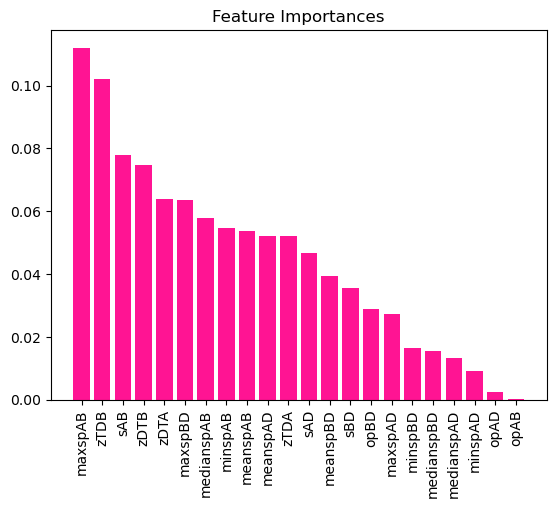

'\nprimekg:\nreport weights balanced  + stratify :\nAccuracy: 0.9892418032786885\n              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      9709\n           1       0.21      0.37      0.27        51\n\n    accuracy                           0.99      9760\n   macro avg       0.60      0.68      0.63      9760\nweighted avg       0.99      0.99      0.99      9760\n\nreport weights balanced  + stratify +removed features :\nAccuracy: 0.9881147540983607\n              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      9709\n           1       0.18      0.37      0.25        51\n\n    accuracy                           0.99      9760\n   macro avg       0.59      0.68      0.62      9760\nweighted avg       0.99      0.99      0.99      9760\n\n\n'

In [73]:
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42,class_weight='balanced')
clf.fit(X_train, Y_train)

#accuracy = clf.score(X_test, Y_test)
# Ausgabe der Genauigkeit und des Klassifikationsberichts

#see sklearn documentation: The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
#print(comparison.head(20))
#specific_drug_combination = ('DB01599', 'DB04825')
# Create a boolean mask where 'Actual' and 'Predicted' values are not equal
mask = comparison['Actual'] != comparison['Predicted']

# Apply this mask to your DataFrame to filter rows
differences = comparison[mask]

#28 falsch predicted
print(differences)
print(len(differences))

#print(filtered_df)
cumulative_importances = np.cumsum(importances[indices])

num_features_50 = np.where(cumulative_importances >= 0.5)[0][0] + 1

# Die wichtigsten Features plotten, die zusammen bis zu 50% der Wichtigkeit ausmachen
plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color='deeppink')
plt.xticks(range(len(importances)),X.columns[indices], rotation=90)
print(X.columns[indices])
plt.show()

'''
primekg:
report weights balanced  + stratify :
Accuracy: 0.9892418032786885
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.21      0.37      0.27        51

    accuracy                           0.99      9760
   macro avg       0.60      0.68      0.63      9760
weighted avg       0.99      0.99      0.99      9760

report weights balanced  + stratify +removed features :
Accuracy: 0.9881147540983607
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.18      0.37      0.25        51

    accuracy                           0.99      9760
   macro avg       0.59      0.68      0.62      9760
weighted avg       0.99      0.99      0.99      9760


'''

'''
CTD:
report weights balanced  + stratify :
Accuracy: 0.9889344262295082
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.19      0.33      0.24        51

    accuracy                           0.99      9760
   macro avg       0.59      0.66      0.62      9760
weighted avg       0.99      0.99      0.99      9760


report weights balanced  + stratify +removed features :
Accuracy: 0.9896516393442623
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.22      0.37      0.27        51

    accuracy                           0.99      9760
   macro avg       0.61      0.68      0.63      9760
weighted avg       0.99      0.99      0.99      9760


report weights balanced  + stratify + removed features +max_depth=28:
Accuracy: 0.9899590163934426
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9709
           1       0.22      0.37      0.28        51

    accuracy                           0.99      9760
   macro avg       0.61      0.68      0.64      9760
weighted avg       0.99      0.99      0.99      9760
'''

In [65]:
print(clf.get_depth()) 

'''
primekg
before removing features: 45
after removing: ['meanspAB', 'meanspBD', 'medianspAD', 'medianspAB',
       'medianspBD', 'maxspAB', 'opBD', 'meanspAD', 'minspBD', 'minspAD',
       'maxspAD', 'opAB'] : 37

'''

41


"\nprimekg\nbefore removing features: 45\nafter removing: ['meanspAB', 'meanspBD', 'medianspAD', 'medianspAB',\n       'medianspBD', 'maxspAB', 'opBD', 'meanspAD', 'minspBD', 'minspAD',\n       'maxspAD', 'opAB'] : 37\n\n"

'''
ctd:
before removing features: 41 
after removing: ['meanspAD', 'maxspAB', 'maxspAD', 'opAD', 'maxspBD', 'meanspBD', 'opBD', 'medianspAD', 'meanspAB', 'minspBD','minspAD', 'opAB','medianspBD', 'minspAB', 'medianspAB'] : 30

'''